In [1]:
import os
import csv
import sys
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
plt.set_cmap("viridis")
font = {'size'   : 15}

matplotlib.rc('font', **font)
markersize = 10

<Figure size 640x480 with 0 Axes>

In [3]:
algorithms = ['MIS-Luby', 'MIS-SW08', 'MIS-GP22', 'MIS-GP22-0.1', 'MIS-GP22-0.5', 'MIS-Lam']
result_dir = "results_mis"
n_tests = 50

In [4]:
failed = {algorithm : [] for algorithm in algorithms}

In [5]:
list_n = list(range(100, 2001, 100))

In [6]:
all_n_active_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_n_average_awake_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_finished_round_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}

for algorithm in algorithms:
    for n in list_n:
        for denseness in ["sparse"]:
            n_success = 0
            for i in range(n_tests):
                result_file = f"{result_dir}/{n}/{denseness}/{algorithm}_{i:03d}.txt"
                if not os.path.isfile(result_file):
                    print(f"Algorithm {algorithm} failed at input {result_file}!")
                    failed[algorithm].append(result_file)
                    continue
                with open(result_file, "r") as f:
                    b = f.readlines()
                    b = list(map(lambda x : x.strip("\r\n"), b))
                    a = b[1]
                    check_result = int(b[-1][-1])
                    if check_result == 0:
                        print(f"Algorithm {algorithm} failed at input {result_file}!")
                        failed[algorithm].append(result_file)
                        continue
                    (n1,
                     n_selected_nodes,
                     total_awake_rounds,
                     average_awake_rounds,
                     finished_round,
                     n_idle_rounds,
                     n_active_rounds) = map(float, a.split())
                    #print(average_awake_rounds, n_active_rounds)
                    all_n_active_rounds[algorithm][n] += n_active_rounds
                    all_finished_round_rounds[algorithm][n] = max(
                        all_finished_round_rounds[algorithm][n], finished_round)
                    if algorithm not in ['MIS-Luby', 'MIS-SW08']:
                        all_n_average_awake_rounds[algorithm][n] += average_awake_rounds
                    else:
                        all_n_average_awake_rounds[algorithm][n] += n_active_rounds
                    n_success += 1
                        
            all_n_active_rounds[algorithm][n] /= n_success
            all_n_average_awake_rounds[algorithm][n] /= n_success
            
            all_n_active_rounds[algorithm][n] = np.round(all_n_active_rounds[algorithm][n], 2)
            all_n_average_awake_rounds[algorithm][n] = np.round(all_n_average_awake_rounds[algorithm][n], 2)

Algorithm MIS-Luby failed at input results_mis/1000/sparse/MIS-Luby_004.txt!
Algorithm MIS-Luby failed at input results_mis/1000/sparse/MIS-Luby_014.txt!
Algorithm MIS-Luby failed at input results_mis/1000/sparse/MIS-Luby_016.txt!
Algorithm MIS-Luby failed at input results_mis/1000/sparse/MIS-Luby_026.txt!
Algorithm MIS-Luby failed at input results_mis/1200/sparse/MIS-Luby_046.txt!
Algorithm MIS-Luby failed at input results_mis/1500/sparse/MIS-Luby_013.txt!
Algorithm MIS-Luby failed at input results_mis/1500/sparse/MIS-Luby_020.txt!
Algorithm MIS-Luby failed at input results_mis/1700/sparse/MIS-Luby_031.txt!
Algorithm MIS-Luby failed at input results_mis/1700/sparse/MIS-Luby_043.txt!
Algorithm MIS-Luby failed at input results_mis/1800/sparse/MIS-Luby_015.txt!
Algorithm MIS-Luby failed at input results_mis/1800/sparse/MIS-Luby_043.txt!
Algorithm MIS-Luby failed at input results_mis/1900/sparse/MIS-Luby_003.txt!
Algorithm MIS-Luby failed at input results_mis/1900/sparse/MIS-Luby_032.txt!

In [7]:
pprint(all_n_active_rounds)

{'MIS-GP22': {100: 15.42,
              200: 17.76,
              300: 18.26,
              400: 18.1,
              500: 20.3,
              600: 19.86,
              700: 20.6,
              800: 22.92,
              900: 23.06,
              1000: 24.18,
              1100: 23.66,
              1200: 24.28,
              1300: 24.38,
              1400: 24.54,
              1500: 26.0,
              1600: 25.3,
              1700: 25.02,
              1800: 24.94,
              1900: 25.1,
              2000: 25.74},
 'MIS-GP22-0.1': {100: 17.14,
                  200: 17.42,
                  300: 19.54,
                  400: 20.96,
                  500: 22.78,
                  600: 22.92,
                  700: 23.44,
                  800: 25.1,
                  900: 22.74,
                  1000: 24.36,
                  1100: 25.16,
                  1200: 26.38,
                  1300: 27.42,
                  1400: 27.75,
                  1500: 27.74,
                  1

In [8]:
pprint(all_n_average_awake_rounds)

{'MIS-GP22': {100: 3.82,
              200: 4.11,
              300: 4.38,
              400: 4.28,
              500: 4.23,
              600: 4.48,
              700: 4.47,
              800: 4.59,
              900: 4.47,
              1000: 4.56,
              1100: 4.71,
              1200: 4.7,
              1300: 4.68,
              1400: 4.67,
              1500: 4.73,
              1600: 4.67,
              1700: 4.69,
              1800: 4.7,
              1900: 4.71,
              2000: 4.73},
 'MIS-GP22-0.1': {100: 6.61,
                  200: 6.98,
                  300: 7.12,
                  400: 7.11,
                  500: 7.29,
                  600: 7.46,
                  700: 7.5,
                  800: 7.58,
                  900: 7.6,
                  1000: 7.64,
                  1100: 7.71,
                  1200: 7.81,
                  1300: 7.82,
                  1400: 7.87,
                  1500: 7.87,
                  1600: 7.93,
                  170

In [9]:
pprint(all_finished_round_rounds)

{'MIS-GP22': {100: 27.0,
              200: 30.0,
              300: 31.0,
              400: 31.0,
              500: 31.0,
              600: 32.0,
              700: 33.0,
              800: 35.0,
              900: 36.0,
              1000: 38.0,
              1100: 37.0,
              1200: 38.0,
              1300: 41.0,
              1400: 39.0,
              1500: 43.0,
              1600: 41.0,
              1700: 43.0,
              1800: 47.0,
              1900: 43.0,
              2000: 41.0},
 'MIS-GP22-0.1': {100: 29.0,
                  200: 34.0,
                  300: 32.0,
                  400: 35.0,
                  500: 37.0,
                  600: 36.0,
                  700: 42.0,
                  800: 42.0,
                  900: 34.0,
                  1000: 40.0,
                  1100: 43.0,
                  1200: 43.0,
                  1300: 47.0,
                  1400: 47.0,
                  1500: 47.0,
                  1600: 47.0,
                 

In [10]:
df_average_awake = pd.DataFrame(all_n_average_awake_rounds)
df_average_awake.to_csv("stat/mis_average_awake.csv")
df_average_awake

,MIS-Luby,MIS-SW08,MIS-GP22,MIS-GP22-0.1,MIS-GP22-0.5,MIS-Lam
100,13.38,9.76,3.82,6.61,4.83,9.88
200,14.40,11.80,4.11,6.98,5.29,9.66
300,14.80,12.68,4.38,7.12,5.58,9.61
400,18.02,13.42,4.28,7.11,5.48,9.64
500,18.44,13.60,4.23,7.29,5.47,9.54
600,18.82,14.94,4.48,7.46,5.74,9.53
700,20.32,15.02,4.47,7.50,5.81,9.60
800,18.56,15.18,4.59,7.58,5.88,9.61
900,19.54,15.46,4.47,7.60,5.82,9.68
1000,21.50,15.72,4.56,7.64,5.90,9.65


In [11]:
df_active_rounds = pd.DataFrame(all_n_active_rounds)
df_active_rounds.to_csv("stat/mis_active_rounds.csv")
df_active_rounds

,MIS-Luby,MIS-SW08,MIS-GP22,MIS-GP22-0.1,MIS-GP22-0.5,MIS-Lam
100,13.38,9.76,15.42,17.14,15.46,18.32
200,14.40,11.80,17.76,17.42,17.38,18.96
300,14.80,12.68,18.26,19.54,18.90,21.58
400,18.02,13.42,18.10,20.96,20.04,21.26
500,18.44,13.60,20.30,22.78,20.26,21.76
600,18.82,14.94,19.86,22.92,22.82,23.10
700,20.32,15.02,20.60,23.44,23.42,23.02
800,18.56,15.18,22.92,25.10,24.42,23.08
900,19.54,15.46,23.06,22.74,23.52,24.42
1000,21.50,15.72,24.18,24.36,25.18,24.88


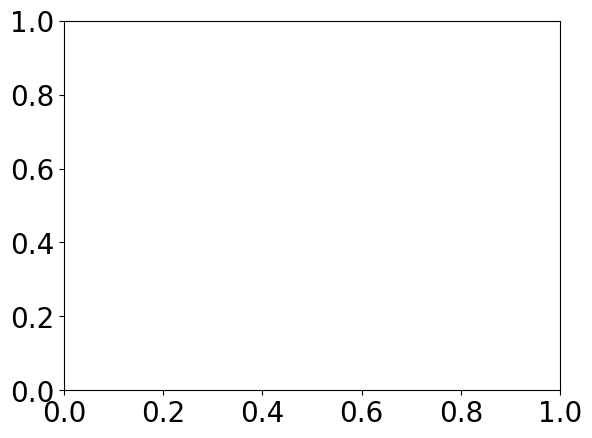

In [25]:
fig, ax = plt.subplots(1,1)

In [26]:
help(fig.legend)

Help on method legend in module matplotlib.figure:

legend(*args, **kwargs) method of matplotlib.figure.Figure instance
    Place a legend on the figure.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        fig.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        fig.legend()
    
    Specific lines can be exclu

In [51]:
help(ax.set_ylabel)

Help on method set_ylabel in module matplotlib.axes._base:

set_ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Set the label for the y-axis.
    
    Parameters
    ----------
    ylabel : str
        The label text.
    
    labelpad : float, default: :rc:`axes.labelpad`
        Spacing in points from the Axes bounding box including ticks
        and tick labels.  If None, the previous value is left as is.
    
    loc : {'bottom', 'center', 'top'}, default: :rc:`yaxis.labellocation`
        The label position. This is a high-level alternative for passing
        parameters *y* and *horizontalalignment*.
    
    Other Parameters
    ----------------
    **kwargs : `.Text` properties
        `.Text` properties control the appearance of the label.
    
    See Also
    --------
    text : Documents the properties supported by `.Text`.



In [62]:
help(plt.setp)

Help on function setp in module matplotlib.pyplot:

setp(obj, *args, **kwargs)
    Set one or more properties on an `.Artist`, or list allowed values.
    
    Parameters
    ----------
    obj : `.Artist` or list of `.Artist`
        The artist(s) whose properties are being set or queried.  When setting
        properties, all artists are affected; when querying the allowed values,
        only the first instance in the sequence is queried.
    
        For example, two lines can be made thicker and red with a single call:
    
        >>> x = arange(0, 1, 0.01)
        >>> lines = plot(x, sin(2*pi*x), x, sin(4*pi*x))
        >>> setp(lines, linewidth=2, color='r')
    
    file : file-like, default: `sys.stdout`
        Where `setp` writes its output when asked to list allowed values.
    
        >>> with open('output.log') as file:
        ...     setp(line, file=file)
    
        The default, ``None``, means `sys.stdout`.
    
    *args, **kwargs
        The properties to set.  T

In [93]:
def plot_df(
    df,
    title=None,
    y_title=-0.2,
    figsize=(30,10),
    markersize=10,
    bbox_to_anchor=(0.5, 0, 0.4, 0.5),
    y_ticks=None,
    y_label=""
):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    r = df.index.values[1::2]
    ax.plot(r, df["MIS-GP22"].values[1::2], marker='v', markersize=markersize, label="MIS-GP22-1")
    ax.plot(r, df["MIS-GP22-0.1"].values[1::2], marker='D', markersize=markersize, label="MIS-GP22-0.1")
    ax.plot(r, df["MIS-GP22-0.5"].values[1::2], marker='o', markersize=markersize, label="MIS-GP22-0.5")
    ax.plot(r, df["MIS-Lam"].values[1::2], marker='x', markersize=markersize, label="MIS-Ours")
    
    ax.set_yticks(y_ticks)
    ax.set_ylabel(y_label)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    ax.set_xticks(r)
    ax.set_xlabel("Number of nodes")
    if title is not None: ax.set_title(title, y=y_title)
    handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels, bbox_to_anchor=(0.6, 1.0), ncol=4)
    fig.legend(handles, labels, bbox_to_anchor=bbox_to_anchor)
    plt.grid()
    return ax

df["MIS-GP22-0.5"].values[1::2] =  [17.38 20.04 22.82 24.42 25.18 25.14 25.06 27.47 27.76 28.08]


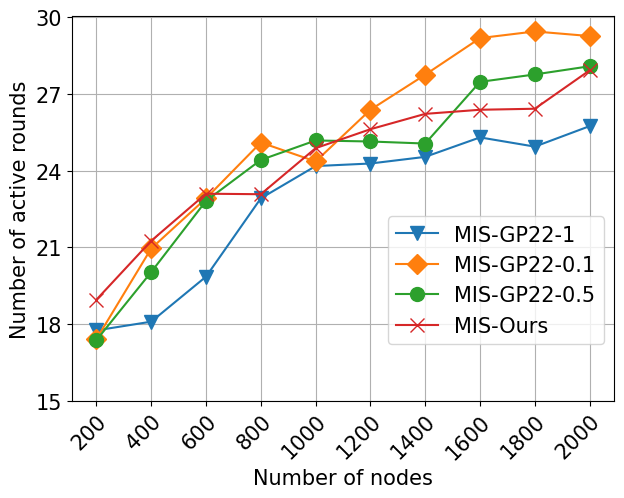

In [94]:
plot_df(df_active_rounds, figsize=(7,5), bbox_to_anchor=(0.5, 0, 0.4, 0.5), y_ticks=[15, 18, 21, 24, 27, 30],
        y_label="Number of active rounds")
plt.savefig("stat/mis_active_rounds.pdf", bbox_inches="tight")

In [104]:
def plot_df_1(
    df,
    title=None,
    y_title=-0.2,
    figsize=(30,10),
    markersize=10,
    bbox_to_anchor=(0.5, 0, 0.4, 0.5),
    y_ticks=None,
    y_label=""
):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    r = df.index.values[1::2]
    ax.plot(r, df["MIS-GP22"].values[1::2], marker='v', markersize=markersize, label="MIS-GP22-1")
    ax.plot(r, df["MIS-Luby"].values[1::2], marker='D', markersize=markersize, label="MIS-Luby")
    ax.plot(r, df["MIS-SW08"].values[1::2], marker='o', markersize=markersize, label="MIS-SW08")
    ax.plot(r, df["MIS-Lam"].values[1::2], marker='x', markersize=markersize, label="MIS-Ours")
    
    ax.set_yticks(y_ticks)
    ax.set_ylabel(y_label)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    ax.set_xticks(r)
    ax.set_xlabel("Number of nodes")
    if title is not None: ax.set_title(title, y=y_title)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=bbox_to_anchor, ncol=2)
    #fig.legend(handles, labels, bbox_to_anchor=bbox_to_anchor)
    plt.grid()
    return ax

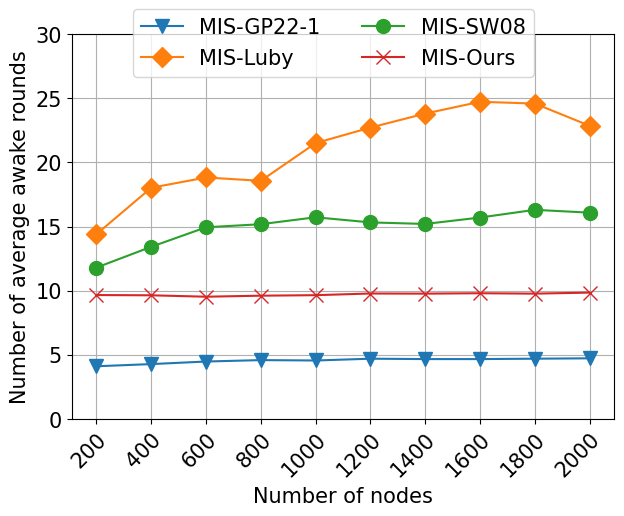

In [116]:
plot_df_1(df_average_awake, figsize=(7,5), bbox_to_anchor=(0.4, 0, 0.4, 0.95), y_ticks=np.arange(0,31,5),
          y_label="Number of average awake rounds")
plt.savefig("stat/mis_average_awake.pdf", bbox_inches="tight")